In [55]:
#Import the relevant packages that we need
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from googletrans import Translator
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
import socket

In [56]:
socket.setdefaulttimeout(600)

In [88]:
combined.property_type.value_counts()

Private room in rental unit            69117
Entire rental unit                     65416
Private room in bed and breakfast      17565
Private room in guest suite            14458
Private room in residential home       13171
Private room in townhouse              11673
Private room in houseboat               8256
Private room in condominium (condo)     6589
Private room in boat                    6504
Room in boutique hotel                  6432
Entire residential home                 5752
Private room in loft                    4835
Entire loft                             3922
Boat                                    3833
Entire condominium (condo)              3750
Entire serviced apartment               3583
Houseboat                               3505
Room in bed and breakfast               3505
Room in hotel                           3444
Entire townhouse                        2661
Entire guest suite                      2638
Entire guesthouse                       1956
Private ro

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHYAMAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHYAMAL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHYAMAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
reviews = pd.read_csv("reviews.csv")

In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272056 entries, 0 to 272055
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     272056 non-null  int64 
 1   id             272056 non-null  int64 
 2   date           272056 non-null  object
 3   reviewer_id    272056 non-null  int64 
 4   reviewer_name  272056 non-null  object
 5   comments       271811 non-null  object
dtypes: int64(3), object(3)
memory usage: 12.5+ MB


In [6]:
listings = pd.read_csv("listings.csv")

In [7]:
combined = reviews.merge(right = listings, how = 'inner', left_on="listing_id", right_on = "id")

In [8]:

to_remove = ',$'

for char in to_remove:
    combined['price'] = combined.price.str.replace(char,"")
    

combined.price.astype('float')




<ipython-input-8-132d87539c74>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined['price'] = combined.price.str.replace(char,"")


0          60.0
1          60.0
2          60.0
3          60.0
4          60.0
          ...  
272051     70.0
272052     70.0
272053    232.0
272054     66.0
272055     66.0
Name: price, Length: 272056, dtype: float64

In [9]:
combined.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,2818,https://www.airbnb.com/rooms/2818,20211205213126,2021-12-06,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,2818,https://www.airbnb.com/rooms/2818,20211205213126,2021-12-06,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,2818,https://www.airbnb.com/rooms/2818,20211205213126,2021-12-06,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,2818,https://www.airbnb.com/rooms/2818,20211205213126,2021-12-06,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,2818,https://www.airbnb.com/rooms/2818,20211205213126,2021-12-06,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83


In [10]:
#Frequency
combined['frequency'] = combined.groupby('reviewer_id').date.transform('count')

combined.frequency.value_counts()

1     257528
2      12254
3       1557
4        412
5        140
6         60
7         35
10        30
8         16
15        15
9          9
Name: frequency, dtype: int64

In [11]:
#

In [12]:
#Here we are just using the minimum nights because we have no data on how long each customer stayed.
#Therefore, we are assuming that the amount that the customer spent is equal to the minimum number of days 
#multiplied by the price of the listing
combined['price'] = combined['price'].astype('float')

#combined['money_spent'] 
#There are some extremely 
#The total price is a proxy for how much that customer spent in that listing
combined['total_price'] = combined['price'] * combined['minimum_nights']

In [13]:
#Take the mean expenditure per customer and assign it to a column called mean_expenditure
combined['mean_expenditure'] = combined.groupby('reviewer_id').total_price.transform('mean')

In [14]:
pd.to_datetime(combined.date).max()

Timestamp('2021-12-05 00:00:00')

In [15]:
#The most recent date is 2021-12-05 (5th december 2021) and we shall use that as our frame of reference
reference_date = pd.to_datetime(combined.date).max()
combined['date'] = pd.to_datetime(combined.date)
#Here, we are creating a new column which signifies what is the time difference between each purchase and the reference date
#in days

combined['diff_days'] = combined['date'].apply(lambda x: reference_date - x).dt.days

In [16]:
#Then, we can analyse the recency of each customer by picking out their most recent purchase
#The recency column represents how many days it has been since that particular customers last purchase relative to the 
#reference date


combined['recency'] = combined.groupby('reviewer_id').diff_days.transform('min')

<AxesSubplot:>

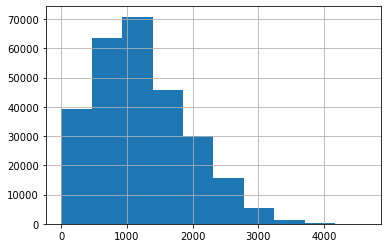

In [17]:
#Looking at the 
combined['recency'].hist()

In [18]:
categories = ['very active', 'active', 'warm', 'cold','inactive']

bins = [0,182,365,1095,1460,5000]

#Not many active people, is possible that it is during the covid period
combined['recency_category'] = pd.cut(x = combined['recency'], bins=bins, labels = categories)



In [19]:
#There are some columns with a recency value of 0 and we shall assign a recency category of very active to this column
combined.loc[combined.recency == 0, 'recency_category'] = 'very active'

In [20]:
#Let us see by date to confirm our theory
pd.set_option('display.max_rows', None)
combined['year'] = combined.date.dt.year
combined['month'] = combined.date.dt.month

#Let us group by the year and count

combined.groupby(['year','month']).reviewer_id.count()


year  month
2009  3           1
      4           1
      5           3
      6           1
      7           1
      9           1
      10          1
      11          3
2010  1           1
      3           2
      4           2
      5           2
      6           4
      7           2
      8           4
      9           5
      10          5
      11          3
      12          1
2011  1           5
      3           7
      4          10
      5          14
      6          23
      7          33
      8          33
      9          43
      10         34
      11         28
      12         11
2012  1          26
      2          20
      3          31
      4          88
      5         101
      6          90
      7          78
      8          96
      9         132
      10        148
      11        127
      12         99
2013  1         126
      2         102
      3         148
      4         301
      5         413
      6         307
      7         381
      8 

<BarContainer object of 11 artists>

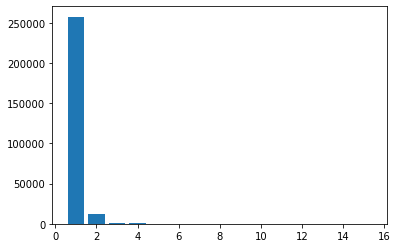

In [21]:
#Bar plot (to make nice later)

plt.bar(x = combined.frequency.value_counts().index, height = combined.frequency.value_counts()) 

In [22]:
combined['frequency_category'] = 'occasional'

In [23]:
combined.loc[combined['frequency'] == 2,'frequency_category'] = 'average'

In [24]:
combined.loc[combined['frequency'] > 2,'frequency_category'] = 'frequent'

In [25]:
combined['frequency_category'].value_counts()

occasional    257528
average        12254
frequent        2274
Name: frequency_category, dtype: int64

In [26]:
#Well spread data so we shall 
combined['mean_expenditure'].value_counts()

300.000000       4622
200.000000       3919
240.000000       3643
160.000000       3474
150.000000       3352
270.000000       3272
180.000000       3065
400.000000       2899
190.000000       2840
140.000000       2718
250.000000       2561
76.000000        2280
170.000000       2123
330.000000       2078
130.000000       2069
360.000000       2061
114.000000       1982
255.000000       1967
285.000000       1952
62.000000        1946
75.000000        1893
158.000000       1849
95.000000        1837
600.000000       1805
210.000000       1783
85.000000        1755
225.000000       1744
100.000000       1706
198.000000       1700
69.000000        1680
152.000000       1669
110.000000       1627
120.000000       1595
192.000000       1566
146.000000       1557
90.000000        1532
87.000000        1524
220.000000       1491
375.000000       1486
106.000000       1470
218.000000       1465
500.000000       1456
214.000000       1448
111.000000       1430
74.000000        1395
450.000000

In [27]:
categories = ["Top 20","Bottom 80"]

eightieth_percentile = combined.mean_expenditure.quantile(0.8)

combined['monetary_category'] = "Bottom 80"

combined.loc[combined.mean_expenditure >= eightieth_percentile, "monetary_category"] = "Top 20"

In [28]:
combined.recency_category.value_counts()

warm           94455
inactive       92286
cold           50465
very active    30293
active          4557
Name: recency_category, dtype: int64

In [29]:
combined.frequency_category.value_counts()

occasional    257528
average        12254
frequent        2274
Name: frequency_category, dtype: int64

In [30]:
combined.recency.head()


0    4633
1    4608
2    4599
3    4584
4    4577
Name: recency, dtype: int64

In [31]:
combined['category'] = 'unlabeled'

In [32]:
combined.frequency_category.value_counts()

occasional    257528
average        12254
frequent        2274
Name: frequency_category, dtype: int64

In [33]:
combined.category.value_counts()

unlabeled    272056
Name: category, dtype: int64

In [34]:
combined.frequency_category.value_counts()

occasional    257528
average        12254
frequent        2274
Name: frequency_category, dtype: int64

In [35]:
recent_customers = ['very active', 'active']
not_recent_customers = ['warm','cold','inactive']

frequent_customers = ['average','frequent']
infrequent_customers = ['occasional']

high_monetary = ['Top 20']

low_monetary = ['Bottom 80']




In [36]:
combined.category.value_counts()

unlabeled    272056
Name: category, dtype: int64

In [37]:
#In the next few cells, we are assigning segments to customers based on their RFM scores.

In [38]:
combined.category = 'unlabelled'

In [39]:
combined.loc[(combined.recency_category.isin(recent_customers)) &  (combined.frequency_category.isin(frequent_customers)) & 
             (combined.monetary_category == 'Top 20'),'category'] = 'champions'

In [40]:
combined.loc[(combined.recency_category.isin(recent_customers)) &  (combined.frequency_category.isin(frequent_customers)) & 
             (combined.monetary_category == 'Bottom 80'),'category'] = 'loyal customers'

In [41]:
combined.loc[(combined.recency_category.isin(recent_customers)) &  (combined.frequency_category.isin(infrequent_customers)) & 
             (combined.monetary_category == 'Bottom 80'),'category'] = 'new customers'

In [42]:
combined.loc[(combined.recency_category.isin(recent_customers)) &  (combined.frequency_category.isin(infrequent_customers)) & 
             (combined.monetary_category == 'Top 20'),'category'] = 'promising'

In [43]:
combined.loc[(combined.recency_category.isin(not_recent_customers)) &  (combined.frequency_category.isin(frequent_customers)) & 
             (combined.monetary_category == 'Top 20'),'category'] = 'need attention'

In [44]:
combined.loc[(combined.recency_category.isin(not_recent_customers)) &  (combined.frequency_category.isin(frequent_customers)) & 
             (combined.monetary_category == 'Bottom 80'),'category'] = 'about to sleep'

In [45]:
combined.loc[(combined.recency_category.isin(not_recent_customers)) &  (combined.frequency_category.isin(infrequent_customers)) & 
             (combined.monetary_category == 'Top 20'),'category'] = 'one hit wonders'

In [46]:
combined.loc[(combined.recency_category.isin(not_recent_customers)) &  (combined.frequency_category.isin(infrequent_customers)) & 
             (combined.monetary_category == 'Bottom 80'),'category'] = 'lost'

In [47]:
combined.category.value_counts()

lost               179750
one hit wonders     46979
new customers       26099
about to sleep       7781
promising            4700
loyal customers      3119
need attention       2696
champions             932
Name: category, dtype: int64

In [73]:
champions = combined.copy().loc[combined.category=='champions',"comments"].to_frame()

In [58]:
champions.head()

,comments,clean_text
1594,The location was great. It was a bit noisy at ...,the location was great it was a bit noisy at t...
2072,Very clean and open home on a quiet street tha...,very clean and open home on a quiet street tha...
2140,Great place for couples.<br/>Great location.<b...,great place for couples great location great a...
2270,"Klaas's houseboat is really wonderful. Modern,...",klaas s houseboat is really wonderful modern c...
2616,"The place is greatly located, 13 mins from the...",the place is greatly located 13 mins from the ...


In [53]:

translator = Translator()
translator.translate('안녕하세요.',dest='en').text

'Hello.'

In [74]:
#Remove the break tag
champions['clean_text'] = champions["comments"].apply(lambda s: re.sub('<br/>'," ", str(s)))
#Change to lower case
champions["clean_text"] = champions["clean_text"].apply(lambda s: str(s).lower())

#Remove the punctuation
champions["clean_text"] = champions["clean_text"].apply(lambda s: ' '.join(re.sub(r'[^\w\s]'," ", str(s)).split()))
#translate any non english sentences that may be there into english

counter = 0
while counter != len(champions):
    try:
        champions.iloc[counter,1] = translator.translate(champions.iloc[counter,1]).text
        counter += 1
    except:
        continue
#Remove the non english words
champions['clean_text'] = champions['clean_text'].apply(lambda x : re.sub("[^a-zA-Z ]+", " ",str(x)))

champions.head()

,comments,clean_text
1594,The location was great. It was a bit noisy at ...,the location was great it was a bit noisy at t...
2072,Very clean and open home on a quiet street tha...,very clean and open home on a quiet street tha...
2140,Great place for couples.<br/>Great location.<b...,great place for couples great location great a...
2270,"Klaas's houseboat is really wonderful. Modern,...",klaas s houseboat is really wonderful modern c...
2616,"The place is greatly located, 13 mins from the...",the place is greatly located mins from the a...


In [75]:
#change the text into a list of words
champions['clean_text'] = champions["clean_text"].apply(word_tokenize)
champions.head()

,comments,clean_text
1594,The location was great. It was a bit noisy at ...,"[the, location, was, great, it, was, a, bit, n..."
2072,Very clean and open home on a quiet street tha...,"[very, clean, and, open, home, on, a, quiet, s..."
2140,Great place for couples.<br/>Great location.<b...,"[great, place, for, couples, great, location, ..."
2270,"Klaas's houseboat is really wonderful. Modern,...","[klaas, s, houseboat, is, really, wonderful, m..."
2616,"The place is greatly located, 13 mins from the...","[the, place, is, greatly, located, mins, from,..."


In [ ]:
champions.head()

In [76]:
#First, we lemmatize the words, ie change words into their base form
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))

#we also need to include some context specific stop words. In this case, some of the context specific stop words are
#airbnb, apartment, host, guest, room etc

context_stop = ['airbnb', 'apartment', 'host', 'guest', 'room', 'place', 'stay','amsterdam','location']

#remove sentiment stop words

sentiment_stop = ['good','perfect','great']

champions['clean_text'] = champions['clean_text'].apply(lambda wordList : [word for word in wordList if word.casefold() not in stop and word.casefold() not in context_stop
                                                                          and word.casefold() not in sentiment_stop])
champions.head()

,comments,clean_text
1594,The location was great. It was a bit noisy at ...,"[bit, noisy, times, street, bad, made, aware, ..."
2072,Very clean and open home on a quiet street tha...,"[clean, open, home, quiet, street, right, next..."
2140,Great place for couples.<br/>Great location.<b...,"[couples, well, organized, wonderful, come, ba..."
2270,"Klaas's houseboat is really wonderful. Modern,...","[klaas, houseboat, really, wonderful, modern, ..."
2616,"The place is greatly located, 13 mins from the...","[greatly, located, mins, airport, min, walk, c..."


In [77]:
#Lemmatization step
champions['clean_text'] = champions['clean_text'].apply(lambda wordList : [lemmatizer.lemmatize(word) for word in wordList])
champions.head()

,comments,clean_text
1594,The location was great. It was a bit noisy at ...,"[bit, noisy, time, street, bad, made, aware, b..."
2072,Very clean and open home on a quiet street tha...,"[clean, open, home, quiet, street, right, next..."
2140,Great place for couples.<br/>Great location.<b...,"[couple, well, organized, wonderful, come, bac..."
2270,"Klaas's houseboat is really wonderful. Modern,...","[klaas, houseboat, really, wonderful, modern, ..."
2616,"The place is greatly located, 13 mins from the...","[greatly, located, min, airport, min, walk, ce..."


In [ ]:
#stemmer =SnowballStemmer(language='english')
#champions['clean_text'] = champions['clean_text'].apply(lambda wordList : [stemmer.stem(word) for word in wordList])

In [ ]:
lst = list(champions['clean_text'].iloc[1,])

cv = CountVectorizer()

In [78]:
champions['sentence'] = champions.clean_text.apply(lambda x: ' '.join(x))

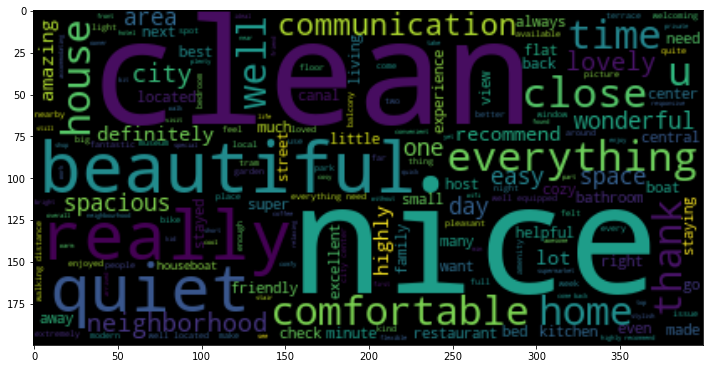

In [79]:
#Combining all the sentences together to create a cloud
big_sentence = ''

for i in champions['sentence']:
    big_sentence += i
big_sentence

wordcloud = WordCloud().generate(text = big_sentence)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')



In [ ]:
bag_of_words = pd.DataFrame(cv.fit_transform(champions['sentence']).toarray())
columns = cv.get_feature_names()

In [ ]:
len(columns)

In [ ]:
bag_of_words.head()

In [ ]:
bag_of_words.columns = columns

In [ ]:
bag_of_words.head()

In [ ]:
for i in columns:
    print(i)

In [ ]:
bag_of_words.head()

In [ ]:
tfidf = TfidfVectorizer()



In [ ]:
# print idf values 
#df_idf = pd.DataFrame(tfidf.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
#df_idf.sort_values(by=['idf_weights'],ascending=False)

In [ ]:
result = tfidf.fit_transform(champions['sentence'])
tfidf.get_feature_names()

In [ ]:
dense = result.todense()
denselist = dense.tolist()
feature_names = tfidf.get_feature_names()
df = pd.DataFrame(denselist,columns=feature_names)

len(df)

In [ ]:
words = df.T.index

In [ ]:
words

In [ ]:
df.T.sum()

In [ ]:
words

In [ ]:
new_df = df.T

new_df.T.sum()

In [ ]:
new_df.index = words

In [ ]:
new_df

Segments

Customers of the highest value
Frequent big spenders: Top 20 and frequent and at least active regardless of recency
Big occasional spenders: Top 20 not occasional and warm
